DESCRIPTION : The dataset contains information on the performance of high school 
students in examination including their grades and demographic information Th 
data was collected from three high schools in the United States.s.

AIM : The aim is to use the train.csv dataset and predict the exam 
score in the test.csv file,ande asked to submit using th 
submission.c.e.

# Import necessary libraries

In [92]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Load the data

In [93]:
train_data = pd.read_csv(r"C:\Users\Navee\Downloads\train.csv")
test_data = pd.read_csv(r"C:\Users\Navee\Downloads\test.csv")

In [94]:
display(train_data)

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81
...,...,...,...,...,...,...,...,...,...
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82


In [95]:
display(test_data)

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62
...,...,...,...,...,...,...,...,...
95,EXA32095,none,male,bachelor's degree,standard,Section B,82,84
96,EXA32096,completed,male,associate's degree,free/reduced,Section B,70,58
97,EXA32097,none,male,some college,standard,Section C,76,67
98,EXA32098,completed,male,associate's degree,standard,Section A,62,71


# Understanding the dataset

In [96]:
display(train_data.head())

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [97]:
display(test_data.tail())

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
95,EXA32095,none,male,bachelor's degree,standard,Section B,82,84
96,EXA32096,completed,male,associate's degree,free/reduced,Section B,70,58
97,EXA32097,none,male,some college,standard,Section C,76,67
98,EXA32098,completed,male,associate's degree,standard,Section A,62,71
99,EXA32099,none,male,high school,standard,Section B,58,67


In [98]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  object
 2   gender                       31999 non-null  object
 3   parental level of education  31999 non-null  object
 4   lunch                        31999 non-null  object
 5   Section                      31999 non-null  object
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.2+ MB
None


In [99]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      100 non-null    object
 1   test preparation             100 non-null    object
 2   gender                       100 non-null    object
 3   parental level of education  100 non-null    object
 4   lunch                        100 non-null    object
 5   Section                      100 non-null    object
 6   practical score              100 non-null    int64 
 7   viva score                   100 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ KB
None


In [100]:
train_data.describe()

,practical score,viva score,exam score
count,31999.000000,31999.000000,31999.000000
mean,67.839870,70.375168,69.139598
std,15.229898,14.092764,15.009974
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [101]:
test_data.describe()

,practical score,viva score
count,100.000000,100.000000
mean,65.190000,68.950000
std,15.530807,14.643491
min,20.000000,38.000000
25%,54.750000,59.000000
50%,65.500000,68.000000
75%,76.250000,77.000000
max,100.000000,100.000000


In [102]:
# Number of rows and columns
train_data.shape

(31999, 9)

In [103]:
test_data.shape

(100, 8)

# Checking for null values

In [104]:
train_data.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

In [105]:
test_data.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
dtype: int64

# Checking for duplicate data

In [106]:
train_data.duplicated().sum()

0

In [107]:
test_data.duplicated().sum()

0

# Performing analysis

The names of the columns present in the dataset

In [108]:
train_data.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')

In [109]:
test_data.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score'],
      dtype='object')

### Distribution of Parental Level of Education in a dataset

In [110]:
a = train_data.value_counts(['parental level of education'])
print("Distribution of Parental Level of Education in the Dataset")
print(a)

Distribution of Parental Level of Education in the Dataset
parental level of education
some college                   7083
high school                    6836
associate's degree             6556
some high school               5471
bachelor's degree              3341
master's degree                2712
Name: count, dtype: int64


In [111]:
b = test_data.value_counts(['parental level of education'])
print("Distribution of Parental Level of Education in the Dataset")
print(b)

Distribution of Parental Level of Education in the Dataset
parental level of education
associate's degree             27
some high school               22
some college                   18
high school                    17
master's degree                 9
bachelor's degree               7
Name: count, dtype: int64


### Distribution of Gender in a dataset

In [112]:
train_data.value_counts(['gender'])

gender
female    16031
male      15968
Name: count, dtype: int64

In [113]:
test_data.value_counts(['gender'])

gender
male      56
female    44
Name: count, dtype: int64

### Distribution of Section in a dataset

In [114]:
train_data.value_counts(['Section'])

Section  
Section C    10323
Section D     8214
Section B     6408
Section E     4555
Section A     2499
Name: count, dtype: int64

In [115]:
test_data.value_counts(['Section'])

Section  
Section D    30
Section C    28
Section B    19
Section E    15
Section A     8
Name: count, dtype: int64

### Distribution of exam score in a dataset

In [116]:
train_data.value_counts(['exam score'])

exam score
78            1035
72            1022
74             991
70             985
63             940
              ... 
27              32
28              32
30              32
35              32
19              32
Name: count, Length: 74, dtype: int64

### 

The highest number of exam score in a dataset

In [117]:
train_data['exam score'][[train_data.value_counts(train_data['exam score']).max()]]

1035    78
Name: exam score, dtype: int64

## Preprocessing the data 
It converts categorial variable into numeric values

In [118]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [119]:
label_encoders = {}
for column in ['gender', 'Section', 'parental level of education', 'lunch', 'test preparation ']:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    label_encoders[column] = le

In [120]:
scaler = StandardScaler()
train_data[['practical score', 'viva score']] = scaler.fit_transform(train_data[['practical score', 'viva score']])
test_data[['practical score', 'viva score']] = scaler.transform(test_data[['practical score', 'viva score']])

In [121]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['Roll no', 'exam score'], axis=1)
y = train_data['exam score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
y

0        70
1        52
2        43
3        41
4        81
         ..
31994    80
31995    68
31996    74
31997    82
31998    82
Name: exam score, Length: 31999, dtype: int64

## Exploratory Data Analysis (EDA)

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of exam scores

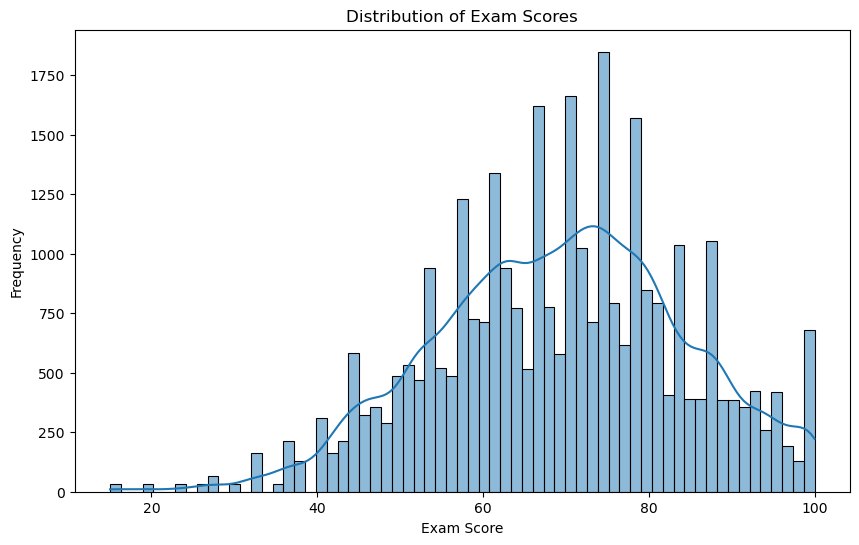

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['exam score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

### Box plot of exam scores by gender

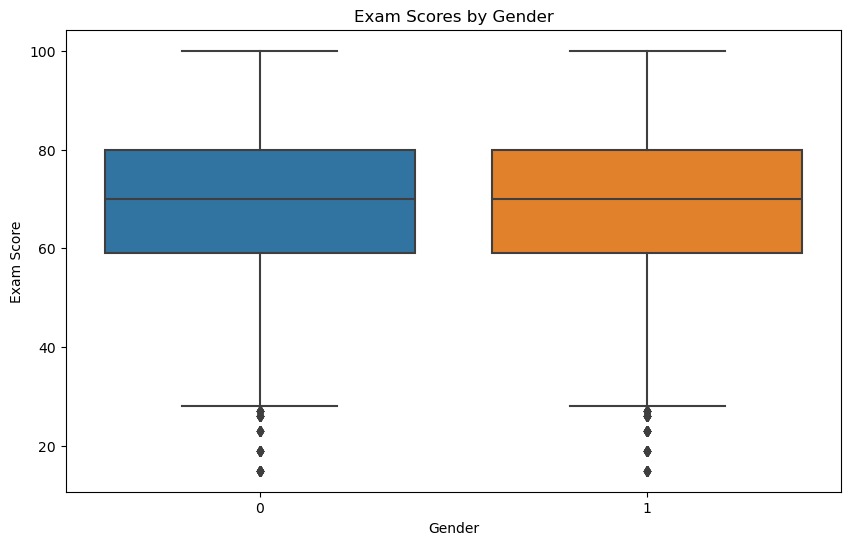

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='exam score', data=train_data)
plt.title('Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.show()

### Box plot of exam scores by parental level of education

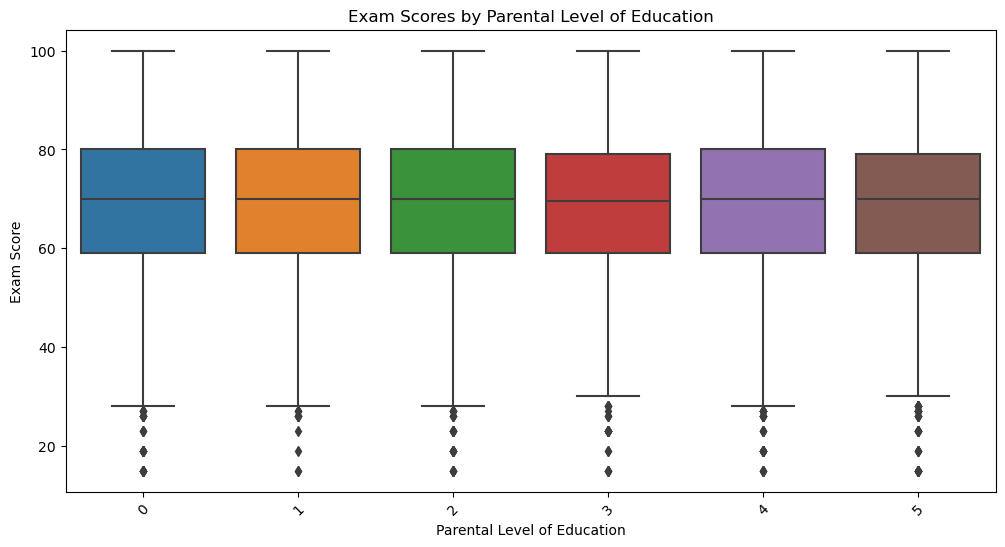

In [133]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='exam score', data=train_data)
plt.title('Exam Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Exam Score')
plt.xticks(rotation=45)
plt.show()

### Bar plot of exam scores by test preparation

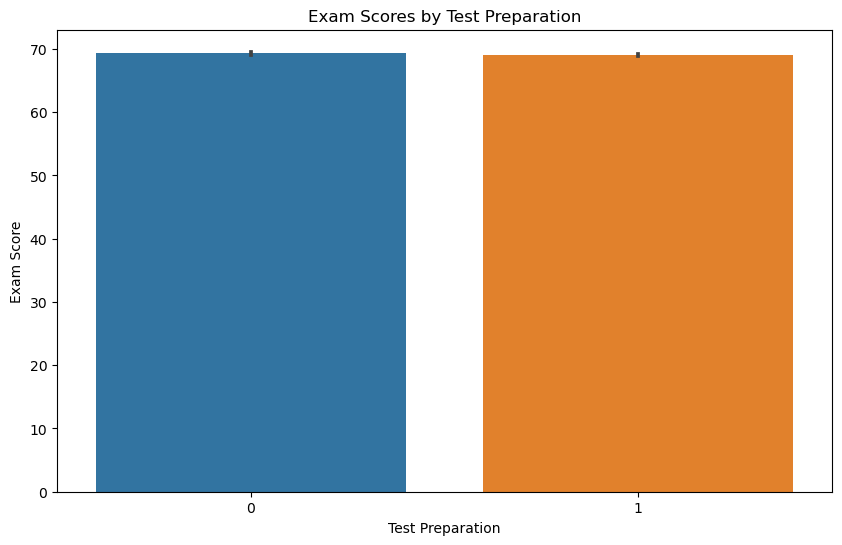

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x='test preparation ', y='exam score', data=train_data)
plt.title('Exam Scores by Test Preparation')
plt.xlabel('Test Preparation')
plt.ylabel('Exam Score')
plt.show()

### Scatter plot of practical score vs. exam score

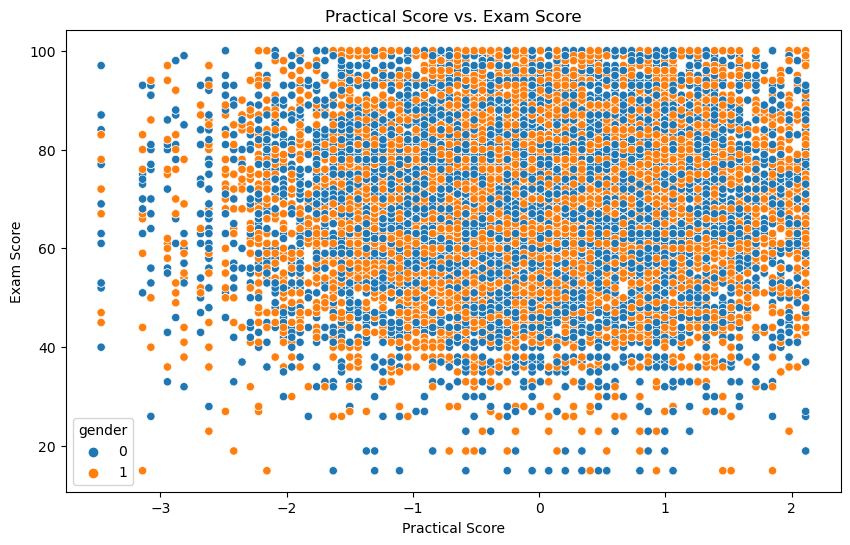

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='practical score', y='exam score', hue='gender', data=train_data)
plt.title('Practical Score vs. Exam Score')
plt.xlabel('Practical Score')
plt.ylabel('Exam Score')
plt.show()

### Scatter plot of viva score vs. exam score

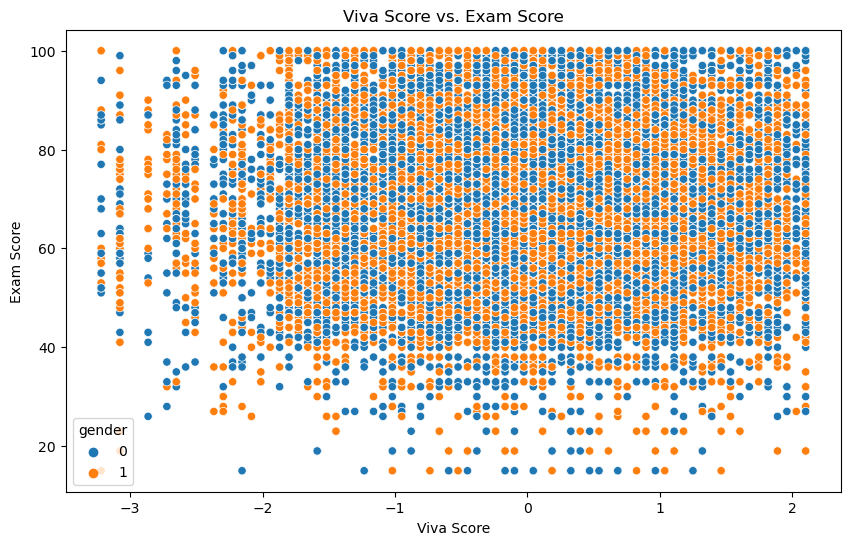

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='viva score', y='exam score', hue='gender', data=train_data)
plt.title('Viva Score vs. Exam Score')
plt.xlabel('Viva Score')
plt.ylabel('Exam Score')
plt.show()

## Correlation Analysis

In [141]:
corr_matrix = train_data[['practical score', 'viva score', 'exam score']].corr()
print(corr_matrix)

                 practical score  viva score  exam score
practical score         1.000000    0.029377    0.017707
viva score              0.029377    1.000000    0.024492
exam score              0.017707    0.024492    1.000000


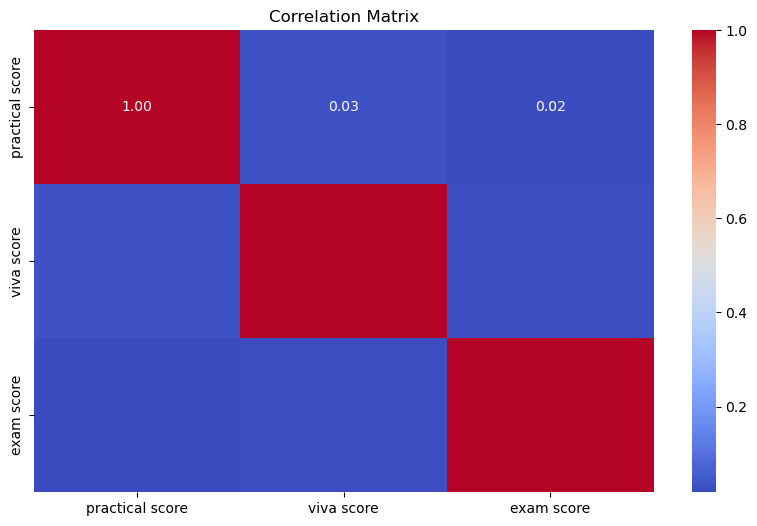

In [142]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Model Buliding

### Random Forest Classifier

In [123]:
# import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

#### Model Training

In [124]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Model Validation

In [125]:
y_pred = model.predict(X_val)
print('Validation Report:\n', classification_report(y_val, y_pred))

Validation Report:
               precision    recall  f1-score   support

          15       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         6
          26       0.33      0.14      0.20         7
          27       0.00      0.00      0.00         7
          28       0.20      0.17      0.18         6
          30       0.00      0.00      0.00         6
          32       0.08      0.12      0.10         8
          33       0.30      0.17      0.21        18
          35       0.12      0.14      0.13         7
          36       0.15      0.17      0.16        23
          37       0.11      0.11      0.11        18
          38       0.09      0.07      0.08        30
          40       0.05      0.08      0.06        13
          41       0.12      0.09      0.10        47
          42       0.06      0.06      0.06        31
          43       0.14      0.18      0.16        39
       

In [128]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print('Random Forest Validation Accuracy: ',accuracy)

Random Forest Validation Accuracy:  0.09484375


#### Submission.csv

In [127]:
X_test = test_data.drop(['Roll no'], axis=1)
test_data['Exam score'] = model.predict(X_test)

In [33]:
print(test_data['Exam score'])

0     74
1     83
2     51
3     78
4     76
      ..
95    92
96    58
97    87
98    64
99    69
Name: Exam score, Length: 100, dtype: int64


In [35]:
submission = test_data[['Roll no', 'Exam score']]
submission.to_csv('submission.csv', index=False)

##### After Building multiple models, I found that random forest classifier has the highest accuracy among others

## Other Models I Built:

### Logistic Regression

In [31]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = train_data.drop(['Roll no', 'exam score'], axis=1)
y = train_data['exam score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Logistic Regression Validation Accuracy:',accuracy)

X_test = test_data.drop(['Roll no'], axis=1) 
test_data['exam score'] = lr_model.predict(X_test)

submission = test_data[['Roll no', 'exam score']]
submission.to_csv('submission_logistic_regression.csv', index=False)

Logistic Regression Validation Accuracy: 0.03375


#### Support Vector Machine

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = train_data.drop(['Roll no', 'exam score'], axis=1)
y = train_data['exam score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Support Vector Machine Validation Accuracy: ',accuracy)

X_test = test_data.drop(['Roll no'], axis=1)
X_test = X_test[X.columns.tolist()] 
test_data['exam score'] = svm_model.predict(X_test)

submission = test_data[['Roll no', 'exam score']]
submission.to_csv('submission_svm.csv', index=False)

Support Vector Machine Validation Accuracy:  0.03703125


#### Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = train_data.drop(['Roll no', 'exam score'], axis=1)
y = train_data['exam score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Gradient Boosting Validation Accuracy: ',accuracy)

X_test = test_data.drop(['Roll no'], axis=1)
test_data['exam score'] = gb_model.predict(X_test)

submission = test_data[['Roll no', 'exam score']]
submission.to_csv('submission_gradient_boosting.csv', index=False)

Gradient Boosting Validation Accuracy:  0.04375
